In [8]:
#importing the libraries

import pandas as pd
import numpy as np

In [9]:
#loading the dataset

df= pd.read_csv('kakuma_food_distribution.csv')

print("Dataset loaded successfully!!")

Dataset loaded successfully!!


# Data exploration

In [46]:
df.shape

(1000, 9)

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Household_ID         1000 non-null   object 
 1   Zone                 900 non-null    object 
 2   Household_Size       900 non-null    float64
 3   Distribution_Date    900 non-null    object 
 4   Ration_Type          900 non-null    object 
 5   Ration_Amount_Kg     900 non-null    float64
 6   Satisfaction_Rating  900 non-null    object 
 7   Rice_Kg              900 non-null    float64
 8   Vegetable_Oil_L      900 non-null    float64
dtypes: float64(4), object(5)
memory usage: 70.4+ KB


In [48]:
df.describe()

,Household_Size,Ration_Amount_Kg,Rice_Kg,Vegetable_Oil_L
count,900.000000,900.000000,900.000000,900.000000
mean,4.976667,40.162333,28.197333,3.000000
std,2.628354,10.052829,7.437082,0.943758
min,1.000000,7.600000,6.000000,0.500000
25%,3.000000,33.300000,23.000000,2.300000
50%,5.000000,40.400000,27.900000,2.900000
75%,7.000000,46.800000,33.300000,3.600000
max,9.000000,72.600000,52.600000,6.300000


## Data Cleaning

## Finding and handling missing data

In [49]:
df.isnull().sum()

Household_ID             0
Zone                   100
Household_Size         100
Distribution_Date      100
Ration_Type            100
Ration_Amount_Kg       100
Satisfaction_Rating    100
Rice_Kg                100
Vegetable_Oil_L        100
dtype: int64

In [50]:
# Filling the empty cells

df['Zone'] = df['Zone'].fillna('Kakuma 1')

df.head()



,Household_ID,Zone,Household_Size,Distribution_Date,Ration_Type,Ration_Amount_Kg,Satisfaction_Rating,Rice_Kg,Vegetable_Oil_L
0,HH0001,Kakuma 4,4.0,2025-06-10,NaN,44.9,NaN,35.5,2.5
1,HH0002,Kalobeyei,4.0,2025-06-06,Cash Transfer,46.6,Satisfied,34.8,4.6
2,HH0003,Kakuma 3,5.0,2025-06-18,E-Voucher,44.4,Very Unsatisfied,31.9,2.6
3,HH0004,Kalobeyei,8.0,2025-06-13,Cash Transfer,31.4,Unsatisfied,24.4,2.6
4,HH0005,Kakuma 1,5.0,2025-06-03,Dry Rations,NaN,Very Unsatisfied,NaN,2.3


In [51]:
df.isnull().sum()

Household_ID             0
Zone                     0
Household_Size         100
Distribution_Date      100
Ration_Type            100
Ration_Amount_Kg       100
Satisfaction_Rating    100
Rice_Kg                100
Vegetable_Oil_L        100
dtype: int64

In [52]:
# using ffill and bfill to fill ration_type and distribution_date
df[['Distribution_Date', 'Ration_Type']] = df[['Distribution_Date', 'Ration_Type']].ffill().bfill()

df.head()

,Household_ID,Zone,Household_Size,Distribution_Date,Ration_Type,Ration_Amount_Kg,Satisfaction_Rating,Rice_Kg,Vegetable_Oil_L
0,HH0001,Kakuma 4,4.0,2025-06-10,Cash Transfer,44.9,NaN,35.5,2.5
1,HH0002,Kalobeyei,4.0,2025-06-06,Cash Transfer,46.6,Satisfied,34.8,4.6
2,HH0003,Kakuma 3,5.0,2025-06-18,E-Voucher,44.4,Very Unsatisfied,31.9,2.6
3,HH0004,Kalobeyei,8.0,2025-06-13,Cash Transfer,31.4,Unsatisfied,24.4,2.6
4,HH0005,Kakuma 1,5.0,2025-06-03,Dry Rations,NaN,Very Unsatisfied,NaN,2.3


In [53]:
df.isnull().sum()

Household_ID             0
Zone                     0
Household_Size         100
Distribution_Date        0
Ration_Type              0
Ration_Amount_Kg       100
Satisfaction_Rating    100
Rice_Kg                100
Vegetable_Oil_L        100
dtype: int64

In [54]:
df['Satisfaction_Rating'] = df['Satisfaction_Rating'].fillna('Very Unsatisfied')

df.head()

,Household_ID,Zone,Household_Size,Distribution_Date,Ration_Type,Ration_Amount_Kg,Satisfaction_Rating,Rice_Kg,Vegetable_Oil_L
0,HH0001,Kakuma 4,4.0,2025-06-10,Cash Transfer,44.9,Very Unsatisfied,35.5,2.5
1,HH0002,Kalobeyei,4.0,2025-06-06,Cash Transfer,46.6,Satisfied,34.8,4.6
2,HH0003,Kakuma 3,5.0,2025-06-18,E-Voucher,44.4,Very Unsatisfied,31.9,2.6
3,HH0004,Kalobeyei,8.0,2025-06-13,Cash Transfer,31.4,Unsatisfied,24.4,2.6
4,HH0005,Kakuma 1,5.0,2025-06-03,Dry Rations,NaN,Very Unsatisfied,NaN,2.3


In [55]:
# filling ration_amount with mean

# Calculate the mean (ignoring NaNs)
mean_val = df['Ration_Amount_Kg'].mean()

# Replace NaNs with the calculated mean
df['Ration_Amount_Kg'] = df['Ration_Amount_Kg'].fillna(mean_val)

df.head()

,Household_ID,Zone,Household_Size,Distribution_Date,Ration_Type,Ration_Amount_Kg,Satisfaction_Rating,Rice_Kg,Vegetable_Oil_L
0,HH0001,Kakuma 4,4.0,2025-06-10,Cash Transfer,44.900000,Very Unsatisfied,35.5,2.5
1,HH0002,Kalobeyei,4.0,2025-06-06,Cash Transfer,46.600000,Satisfied,34.8,4.6
2,HH0003,Kakuma 3,5.0,2025-06-18,E-Voucher,44.400000,Very Unsatisfied,31.9,2.6
3,HH0004,Kalobeyei,8.0,2025-06-13,Cash Transfer,31.400000,Unsatisfied,24.4,2.6
4,HH0005,Kakuma 1,5.0,2025-06-03,Dry Rations,40.162333,Very Unsatisfied,NaN,2.3


In [56]:
#checking the remaining missing valus

df.isnull().sum()

Household_ID             0
Zone                     0
Household_Size         100
Distribution_Date        0
Ration_Type              0
Ration_Amount_Kg         0
Satisfaction_Rating      0
Rice_Kg                100
Vegetable_Oil_L        100
dtype: int64

In [57]:
# using ffill and bfill to fill rice_kg

df['Rice_Kg'] = df['Rice_Kg'].ffill().bfill()

df.head()

,Household_ID,Zone,Household_Size,Distribution_Date,Ration_Type,Ration_Amount_Kg,Satisfaction_Rating,Rice_Kg,Vegetable_Oil_L
0,HH0001,Kakuma 4,4.0,2025-06-10,Cash Transfer,44.900000,Very Unsatisfied,35.5,2.5
1,HH0002,Kalobeyei,4.0,2025-06-06,Cash Transfer,46.600000,Satisfied,34.8,4.6
2,HH0003,Kakuma 3,5.0,2025-06-18,E-Voucher,44.400000,Very Unsatisfied,31.9,2.6
3,HH0004,Kalobeyei,8.0,2025-06-13,Cash Transfer,31.400000,Unsatisfied,24.4,2.6
4,HH0005,Kakuma 1,5.0,2025-06-03,Dry Rations,40.162333,Very Unsatisfied,24.4,2.3


In [58]:
# filling Vegetable_Oil_L with mean

# Calculate the mean (ignoring NaNs)
mean_val = df['Vegetable_Oil_L'].mean()

# Replace NaNs with the calculated mean
df['Vegetable_Oil_L'] = df['Vegetable_Oil_L'].fillna(mean_val)

df.head()

,Household_ID,Zone,Household_Size,Distribution_Date,Ration_Type,Ration_Amount_Kg,Satisfaction_Rating,Rice_Kg,Vegetable_Oil_L
0,HH0001,Kakuma 4,4.0,2025-06-10,Cash Transfer,44.900000,Very Unsatisfied,35.5,2.5
1,HH0002,Kalobeyei,4.0,2025-06-06,Cash Transfer,46.600000,Satisfied,34.8,4.6
2,HH0003,Kakuma 3,5.0,2025-06-18,E-Voucher,44.400000,Very Unsatisfied,31.9,2.6
3,HH0004,Kalobeyei,8.0,2025-06-13,Cash Transfer,31.400000,Unsatisfied,24.4,2.6
4,HH0005,Kakuma 1,5.0,2025-06-03,Dry Rations,40.162333,Very Unsatisfied,24.4,2.3


In [59]:
# using ffill and bfill to fill Household_Size

df['Household_Size'] = df['Household_Size'].ffill().bfill()

df.head()

,Household_ID,Zone,Household_Size,Distribution_Date,Ration_Type,Ration_Amount_Kg,Satisfaction_Rating,Rice_Kg,Vegetable_Oil_L
0,HH0001,Kakuma 4,4.0,2025-06-10,Cash Transfer,44.900000,Very Unsatisfied,35.5,2.5
1,HH0002,Kalobeyei,4.0,2025-06-06,Cash Transfer,46.600000,Satisfied,34.8,4.6
2,HH0003,Kakuma 3,5.0,2025-06-18,E-Voucher,44.400000,Very Unsatisfied,31.9,2.6
3,HH0004,Kalobeyei,8.0,2025-06-13,Cash Transfer,31.400000,Unsatisfied,24.4,2.6
4,HH0005,Kakuma 1,5.0,2025-06-03,Dry Rations,40.162333,Very Unsatisfied,24.4,2.3


In [60]:
# checking the missing values

df.isnull().sum()

Household_ID           0
Zone                   0
Household_Size         0
Distribution_Date      0
Ration_Type            0
Ration_Amount_Kg       0
Satisfaction_Rating    0
Rice_Kg                0
Vegetable_Oil_L        0
dtype: int64

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Household_ID         1000 non-null   object 
 1   Zone                 1000 non-null   object 
 2   Household_Size       1000 non-null   float64
 3   Distribution_Date    1000 non-null   object 
 4   Ration_Type          1000 non-null   object 
 5   Ration_Amount_Kg     1000 non-null   float64
 6   Satisfaction_Rating  1000 non-null   object 
 7   Rice_Kg              1000 non-null   float64
 8   Vegetable_Oil_L      1000 non-null   float64
dtypes: float64(4), object(5)
memory usage: 70.4+ KB


In [62]:
# checking for the duplicates

duplicates = df.duplicated()
print(duplicates.sum())

0


### Looking for inconsistensies

In [63]:
df['Ration_Type'].unique()

array(['Cash Transfer', 'E-Voucher', 'Dry Rations'], dtype=object)

In [64]:
df['Satisfaction_Rating'].unique()

array(['Very Unsatisfied', 'Satisfied', 'Unsatisfied', 'Very Satisfied',
       'Neutral'], dtype=object)

In [65]:
df['Zone'].unique()

array(['Kakuma 4', 'Kalobeyei', 'Kakuma 3', 'Kakuma 1', 'Kakuma 2'],
      dtype=object)

In [66]:
df['Distribution_Date'].unique()

array(['2025-06-10', '2025-06-06', '2025-06-18', '2025-06-13',
       '2025-06-03', '2025-06-30', '2025-06-24', '2025-06-14',
       '2025-06-16', '2025-06-07', '2025-06-20', '2025-06-15',
       '2025-06-21', '2025-06-02', '2025-06-27', '2025-06-25',
       '2025-06-29', '2025-06-22', '2025-06-01', '2025-07-01',
       '2025-06-09', '2025-06-08', '2025-06-04', '2025-06-28',
       '2025-06-12', '2025-06-11', '2025-06-23', '2025-06-19',
       '2025-06-17', '2025-06-05', '2025-06-26'], dtype=object)

## Data Transformation

In [67]:
# Calculate per person ration for each food item
df['Rice_Per_Person'] = df['Rice_Kg'] / df['Household_Size']
df['Oil_Per_Person'] = df['Vegetable_Oil_L'] / df['Household_Size']
df['Ration_Amount_Per_Person'] = df['Ration_Amount_Kg'] / df['Household_Size']

print(df[['Household_ID', 'Rice_Per_Person', 'Oil_Per_Person', 'Ration_Amount_Per_Person']])

    Household_ID  Rice_Per_Person  Oil_Per_Person  Ration_Amount_Per_Person
0         HH0001         8.875000        0.625000                 11.225000
1         HH0002         8.700000        1.150000                 11.650000
2         HH0003         6.380000        0.520000                  8.880000
3         HH0004         3.050000        0.325000                  3.925000
4         HH0005         4.880000        0.460000                  8.032467
..           ...              ...             ...                       ...
995       HH0996         4.016667        0.383333                  6.500000
996       HH0997         6.900000        0.600000                  8.650000
997       HH0998         7.220000        0.940000                  9.840000
998       HH0999        10.325000        1.275000                 15.725000
999       HH1000        27.800000        2.700000                 40.162333

[1000 rows x 4 columns]


In [68]:
df.head()

,Household_ID,Zone,Household_Size,Distribution_Date,Ration_Type,Ration_Amount_Kg,Satisfaction_Rating,Rice_Kg,Vegetable_Oil_L,Rice_Per_Person,Oil_Per_Person,Ration_Amount_Per_Person
0,HH0001,Kakuma 4,4.0,2025-06-10,Cash Transfer,44.900000,Very Unsatisfied,35.5,2.5,8.875,0.625,11.225000
1,HH0002,Kalobeyei,4.0,2025-06-06,Cash Transfer,46.600000,Satisfied,34.8,4.6,8.700,1.150,11.650000
2,HH0003,Kakuma 3,5.0,2025-06-18,E-Voucher,44.400000,Very Unsatisfied,31.9,2.6,6.380,0.520,8.880000
3,HH0004,Kalobeyei,8.0,2025-06-13,Cash Transfer,31.400000,Unsatisfied,24.4,2.6,3.050,0.325,3.925000
4,HH0005,Kakuma 1,5.0,2025-06-03,Dry Rations,40.162333,Very Unsatisfied,24.4,2.3,4.880,0.460,8.032467


In [69]:
df.shape

(1000, 12)

In [72]:
# Group distribution data by geographical zones within the camp to
enable zone-specific analysis.

# Assuming df is your cleaned DataFrame
df['Distribution_Date'] = pd.to_datetime(df['Distribution_Date'])

# Aggregate total and mean per zone
zonal_distribution= df.groupby('Zone').agg(
    total_ration_kg = ('Ration_Amount_Kg', 'sum'),
    avg_ration_per_household = ('Ration_Amount_Kg', 'mean'),
    total_households = ('Household_ID', 'nunique'),
    avg_household_size = ('Household_Size', 'mean')
).reset_index()

zonal_distribution

,Zone,total_ration_kg,avg_ration_per_household,total_households,avg_household_size
0,Kakuma 1,11572.320667,41.182636,281,5.185053
1,Kakuma 2,7062.085667,39.233809,180,5.311111
2,Kakuma 3,6773.758333,40.081410,169,4.887574
3,Kakuma 4,7777.046667,40.087869,194,4.664948
4,Kalobeyei,6977.122000,39.642739,176,4.750000


In [79]:
# Group distribution data by geographical zones within the camp to
#enable zone-specific analysis.
# Flatten multiple items into a total food distribution per row:

df['Total_Food_Kg'] = df[['Rice_Kg', 'Vegetable_Oil_L', 'Ration_Amount_Kg']].sum(axis=1)


In [83]:
# Flatten index to avoid grouping bug
df = df.reset_index(drop=True)

df['Zone_Monthly_Total_Kg'] = (
    df.groupby(['Zone', pd.Grouper(key='Distribution_Date', freq='ME')])['Total_Food_Kg']
      .transform('sum')
)

df['Zone_Quarterly_Total_Kg'] = (
    df.groupby(['Zone', pd.Grouper(key='Distribution_Date', freq='QE')])['Total_Food_Kg']
      .transform('sum')
)

df.head()

,Household_ID,Zone,Household_Size,Distribution_Date,Ration_Type,Ration_Amount_Kg,Satisfaction_Rating,Rice_Kg,Vegetable_Oil_L,Rice_Per_Person,Oil_Per_Person,Ration_Amount_Per_Person,Zone_Monthly_Total_Kg,Total_Food_Kg,Zone_Quarterly_Total_Kg
0,HH0001,Kakuma 4,4.0,2025-06-10,Cash Transfer,44.900000,Very Unsatisfied,35.5,2.5,8.875,0.625,11.225000,13447.046667,82.900000,13447.046667
1,HH0002,Kalobeyei,4.0,2025-06-06,Cash Transfer,46.600000,Satisfied,34.8,4.6,8.700,1.150,11.650000,12046.835000,86.000000,12046.835000
2,HH0003,Kakuma 3,5.0,2025-06-18,E-Voucher,44.400000,Very Unsatisfied,31.9,2.6,6.380,0.520,8.880000,11340.596000,78.900000,11340.596000
3,HH0004,Kalobeyei,8.0,2025-06-13,Cash Transfer,31.400000,Unsatisfied,24.4,2.6,3.050,0.325,3.925000,12046.835000,58.400000,12046.835000
4,HH0005,Kakuma 1,5.0,2025-06-03,Dry Rations,40.162333,Very Unsatisfied,24.4,2.3,4.880,0.460,8.032467,19830.820667,66.862333,19830.820667


In [82]:
df['Zone_Monthly_Total_Kg'].unique()



array([13447.04666667, 12046.835     , 11340.596     , 19830.82066667,
       12251.68566667,   679.36233333,   502.087     ,   294.8       ,
         669.6       ,   338.7       ])

In [101]:
# satisfaction ratings per zone in relation to ration type

# Use pivot_table to calculate % of satisfaction ratings per Zone+Ration_Type
pt = df.pivot_table(
    index=['Zone', 'Ration_Type'],
    columns='Satisfaction_Rating',
    values='Household_ID',            # or any column; counts are based on households
    aggfunc='count',
    margins=True,
    margins_name='All',
    fill_value=0
)

df.head()

,Household_ID,Zone,Household_Size,Distribution_Date,Ration_Type,Ration_Amount_Kg,Satisfaction_Rating,Rice_Kg,Vegetable_Oil_L,Rice_Per_Person,Oil_Per_Person,Ration_Amount_Per_Person,Zone_Monthly_Total_Kg,Total_Food_Kg,Zone_Quarterly_Total_Kg
0,HH0001,Kakuma 4,4.0,2025-06-10,Cash Transfer,44.90,Very Unsatisfied,35.5,2.5,8.88,0.62,11.22,13447.05,82.90,13447.05
1,HH0002,Kalobeyei,4.0,2025-06-06,Cash Transfer,46.60,Satisfied,34.8,4.6,8.70,1.15,11.65,12046.84,86.00,12046.84
2,HH0003,Kakuma 3,5.0,2025-06-18,E-Voucher,44.40,Very Unsatisfied,31.9,2.6,6.38,0.52,8.88,11340.60,78.90,11340.60
3,HH0004,Kalobeyei,8.0,2025-06-13,Cash Transfer,31.40,Unsatisfied,24.4,2.6,3.05,0.32,3.92,12046.84,58.40,12046.84
4,HH0005,Kakuma 1,5.0,2025-06-03,Dry Rations,40.16,Very Unsatisfied,24.4,2.3,4.88,0.46,8.03,19830.82,66.86,19830.82


## Final Clenaed Dataset

In [96]:
# Rounding off to 3 decimal places

df = df.round(3) 

df.head()

,Household_ID,Zone,Household_Size,Distribution_Date,Ration_Type,Ration_Amount_Kg,Satisfaction_Rating,Rice_Kg,Vegetable_Oil_L,Rice_Per_Person,Oil_Per_Person,Ration_Amount_Per_Person,Zone_Monthly_Total_Kg,Total_Food_Kg,Zone_Quarterly_Total_Kg
0,HH0001,Kakuma 4,4.0,2025-06-10,Cash Transfer,44.90,Very Unsatisfied,35.5,2.5,8.88,0.62,11.22,13447.05,82.90,13447.05
1,HH0002,Kalobeyei,4.0,2025-06-06,Cash Transfer,46.60,Satisfied,34.8,4.6,8.70,1.15,11.65,12046.84,86.00,12046.84
2,HH0003,Kakuma 3,5.0,2025-06-18,E-Voucher,44.40,Very Unsatisfied,31.9,2.6,6.38,0.52,8.88,11340.60,78.90,11340.60
3,HH0004,Kalobeyei,8.0,2025-06-13,Cash Transfer,31.40,Unsatisfied,24.4,2.6,3.05,0.32,3.92,12046.84,58.40,12046.84
4,HH0005,Kakuma 1,5.0,2025-06-03,Dry Rations,40.16,Very Unsatisfied,24.4,2.3,4.88,0.46,8.03,19830.82,66.86,19830.82


In [10]:
df.to_csv("cleaned_kakuma_food_distribution.csv")

In [11]:
import matplotlib.pyplot as plt


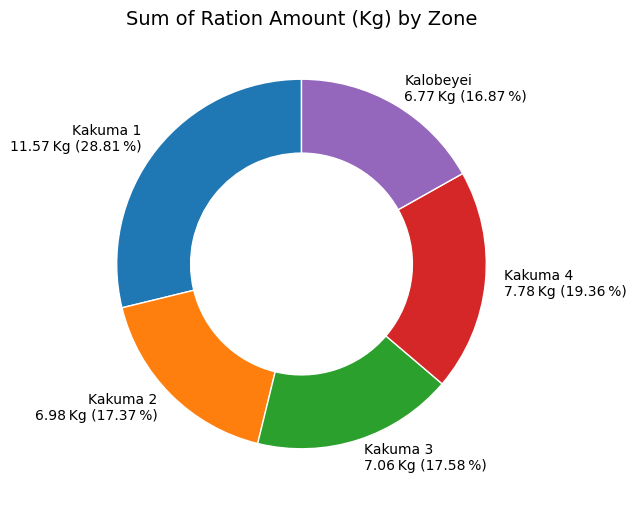

In [12]:
# Your data
zones = ['Kakuma 1', 'Kakuma 2', 'Kakuma 3', 'Kakuma 4', 'Kalobeyei']
ration_amounts = [11.57, 6.98, 7.06, 7.78, 6.77]
percentages = [28.81, 17.37, 17.58, 19.36, 16.87]

# Create labels
labels = [
    f'{zone}\n{amount:.2f} Kg ({percent:.2f} %)'
    for zone, amount, percent in zip(zones, ration_amounts, percentages)
]

# Create figure and axis with white background
fig, ax = plt.subplots(figsize=(8, 6), subplot_kw=dict(aspect="equal"),
                       facecolor='white')
ax.set_facecolor('white')  # axes background white :contentReference[oaicite:1]{index=1}

# Plot donut chart
wedges, texts = ax.pie(
    ration_amounts,
    labels=labels,
    startangle=90,
    wedgeprops=dict(width=0.4, edgecolor='white', linewidth=1)
)

# Add center white circle to reinforce donut hole
centre_circle = plt.Circle((0, 0), 0.6, fc='white')
ax.add_artist(centre_circle)

# Style text
plt.setp(texts, color='black')

# Title
plt.title('Sum of Ration Amount (Kg) by Zone', color='black', fontsize=14)

plt.show()
